In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 1.Data Cleaning

In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)

In [5]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [6]:
# renaming the columns

df.rename({'v1':'target','v2':'text'},axis =1,inplace = True)

In [7]:
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['target'] = le.fit_transform(df['target'])

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for the duplicates

df.duplicated().sum()

403

In [12]:
# remove the dupliactes

df = df.drop_duplicates(keep = 'first',ignore_index = True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

# 2.EDA

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

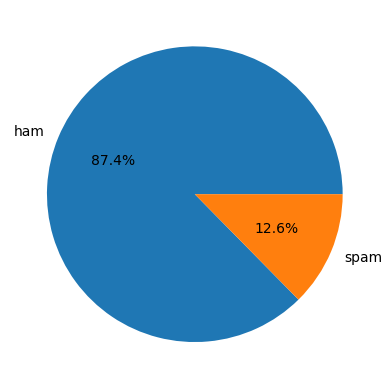

In [17]:
plt.pie(df.target.value_counts(),labels = ['ham','spam'],autopct = '%0.1f%%')
plt.show()

In [18]:
# Data is imbalanced

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91868\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of words

df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5164    [This, is, the, 2nd, time, we, have, tried, 2,...
5165     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5166    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5167    [The, guy, did, some, bitching, but, I, acted,...
5168                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [23]:
 df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
 df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_words,5169.0,18.455794,13.324758,1.0,9.0,15.0,26.0,220.0
num_sentences,5169.0,1.965564,1.448541,1.0,1.0,1.0,2.0,38.0


In [28]:
#ham

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
num_words,4516.0,17.123782,13.493970,1.0,8.0,13.0,22.0,220.0
num_sentences,4516.0,1.820195,1.383657,1.0,1.0,1.0,2.0,38.0


In [29]:
# spam

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
num_words,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0
num_sentences,653.0,2.970904,1.488425,1.0,2.0,3.0,4.0,9.0


<Axes: xlabel='num_characters', ylabel='Count'>

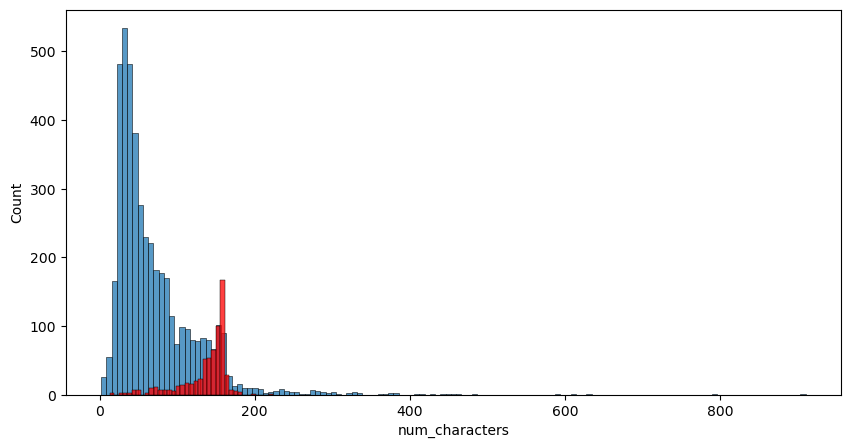

In [30]:
plt.figure(figsize = (10,5))

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

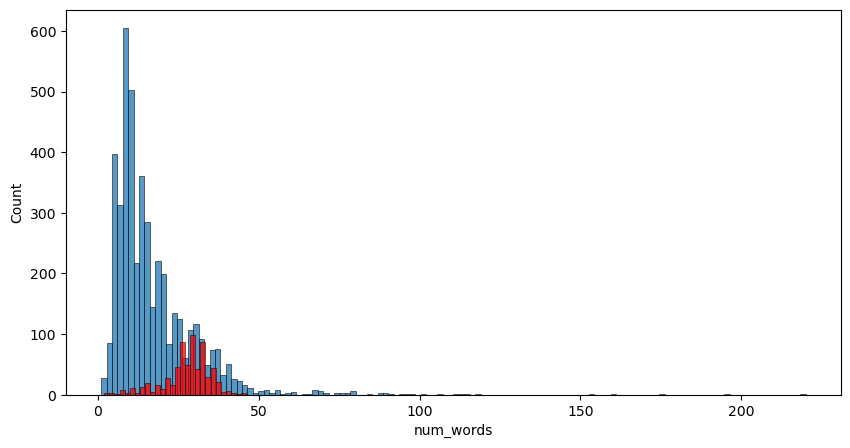

In [31]:
plt.figure(figsize = (10,5))

sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

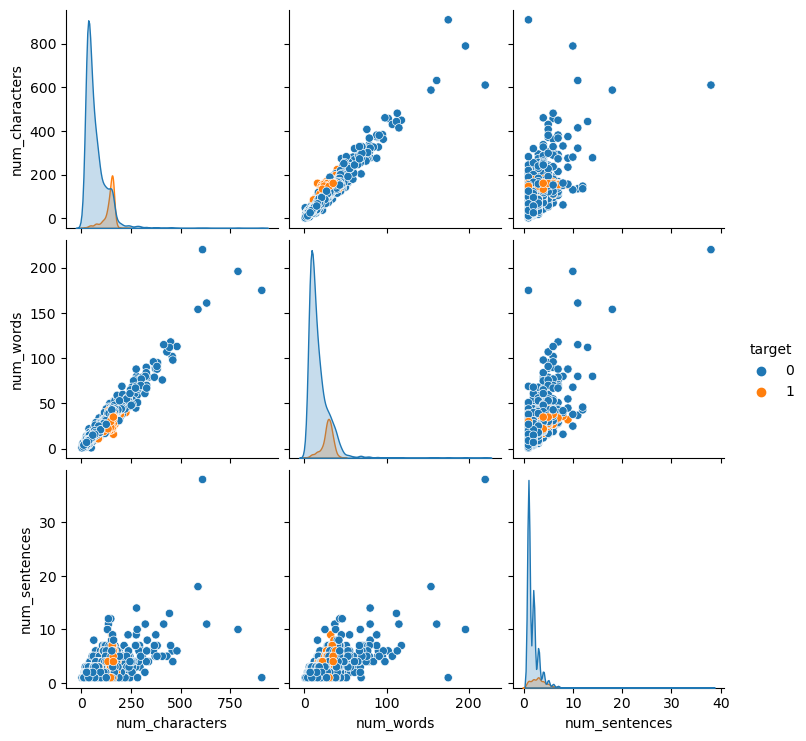

In [32]:
sns.pairplot(df,hue = 'target')

<Axes: >

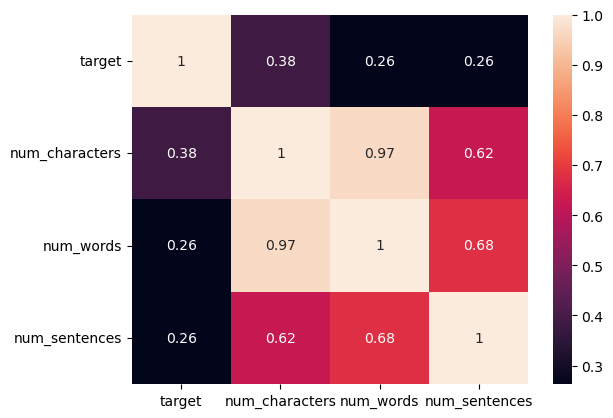

In [33]:
df_c = df[['target','num_characters','num_words','num_sentences']]

sns.heatmap(df_c.corr(),annot = True)

# 3.Text preprocessing

- Lower case
- Tokenization
- Removing special characs
- Removing stopwords and punctuation
- Stemming

In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [35]:
corpus = []
for i in range(len(df)):
    l = re.sub('[^a-zA-Z0-9]',' ',df['text'][i])
    l = l.lower()
    l = l.split()
    l = [ps.stem(i) for i in l if i not in set(stopwords.words('english'))]
    l = ' '.join(l)
    corpus.append(l)
print(corpus)




['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun', 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour', 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info', 'urgent 1 week free membership 100 

In [36]:
df['transformed_text'] = corpus

In [37]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000,height = 1000,min_font_size = 10,background_color = 'white')

In [39]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))

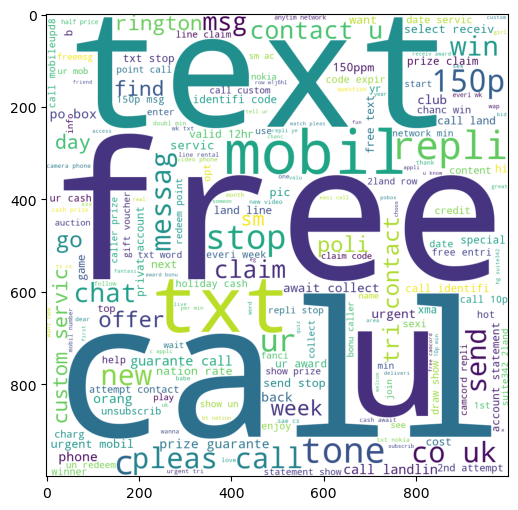

In [40]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [41]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))

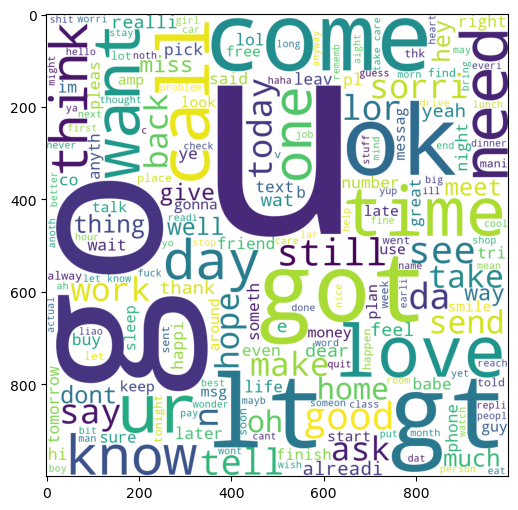

In [42]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [45]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30)).head()

,0,1
0,call,332
1,free,195
2,2,184
3,u,147
4,txt,145


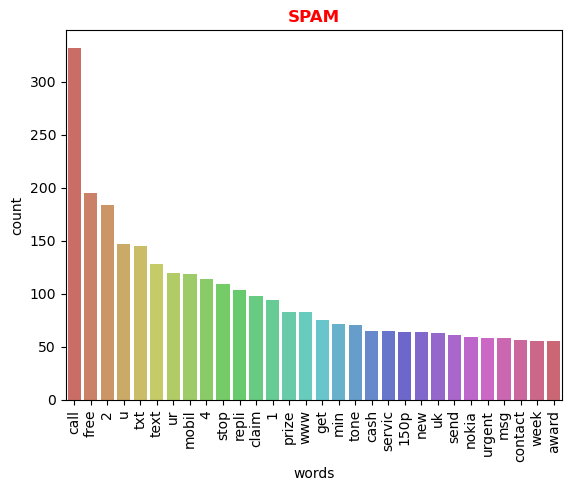

In [46]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1],
           palette = 'hls')
plt.xticks(rotation = 90)
plt.xlabel('words')
plt.ylabel('count')
plt.title('SPAM',fontweight = 'bold',color = 'red')
plt.show()


In [47]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

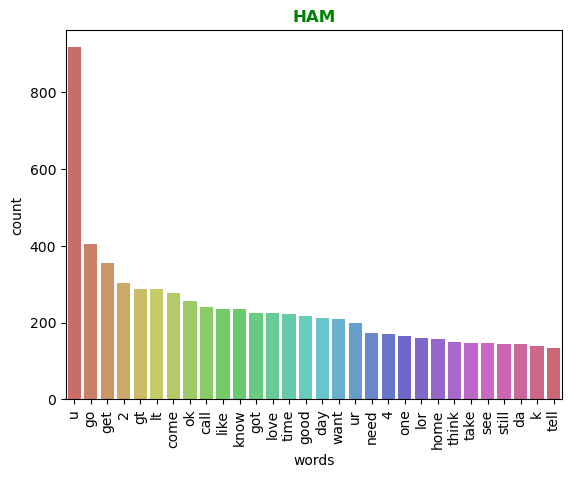

In [48]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1],
           palette = 'hls')
plt.xticks(rotation = 90)
plt.xlabel('words')
plt.ylabel('count')
plt.title('HAM',fontweight = 'bold',color = 'green')
plt.show()


# Vectorization

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [77]:
X.shape

(5169, 3000)

In [53]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
y = df['target']


# 4.Model Building

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [81]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [82]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [83]:
gnb.fit(X_train,y_train)
ypred_test1 = gnb.predict(X_test)

print(accuracy_score(y_test,ypred_test1))
print(confusion_matrix(y_test,ypred_test1))
print(precision_score(y_test,ypred_test1))


0.8771760154738878
[[789 107]
 [ 20 118]]
0.5244444444444445


In [84]:
mnb.fit(X_train,y_train)
ypred_test2 = mnb.predict(X_test)

print(accuracy_score(y_test,ypred_test2))
print(confusion_matrix(y_test,ypred_test2))
print(precision_score(y_test,ypred_test2))

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [85]:
bnb.fit(X_train,y_train)
ypred_test3 = bnb.predict(X_test)

print(accuracy_score(y_test,ypred_test3))
print(confusion_matrix(y_test,ypred_test3))
print(precision_score(y_test,ypred_test3))

0.988394584139265
[[896   0]
 [ 12 126]]
1.0


In [86]:
# tfidf ------> mnb

In [87]:
import pickle
 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [88]:
X.shape

(5169, 3000)

In [89]:
X.shape

(5169, 3000)